Perform additional statistical analyses to have a stronger grasp on the dataset, including autocorrelation, time-series decomposition and stationarity tests.

## Autocorrelation 

$$s_{k}=\frac{1}{n} \sum_{i=1}^{n-k}\left(y_{i}-\bar{y}\right)\left(y_{i+k}-\bar{y}\right)=\frac{1}{n} \sum_{i=k+1}^{n}\left(y_{i}-\bar{y}\right)\left(y_{i-k}-\bar{y}\right)$$  

$$r_k = \frac{s_k}{s_0}$$

In [2]:
import pandas as pd
from matplotlib import pyplot
from script.morestats import log_return

In [6]:
data_folder = "./data/"
crypto_df = pd.read_csv(data_folder + 'train.csv')

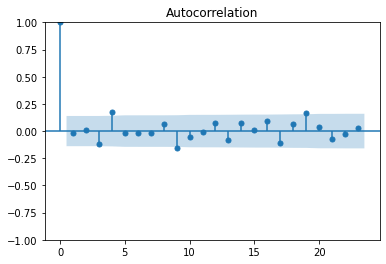

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc_mini = btc.iloc[-200:] # Select recent data rows
lret_btc = log_return(btc_mini.Close)[1:]
plot_acf(lret_btc)
pyplot.show()

## Partial Autocorrelation
$$\frac{\operatorname{cov}\left(y_{i}, y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}{\sqrt{\operatorname{var}\left(y_{i} \mid y_{i-1}, \ldots, y_{i-h+1}\right) \cdot \operatorname{var}\left(y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}}$$

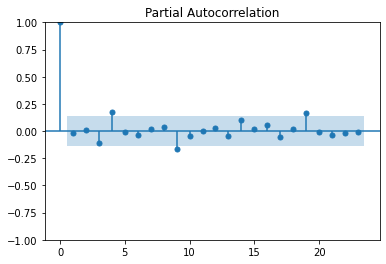

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lret_btc,method='ywm')
pyplot.show()